In [1]:
import h5py
import numpy as np
import networkx as nx

In [5]:
def func(name, obj):
    print(name)

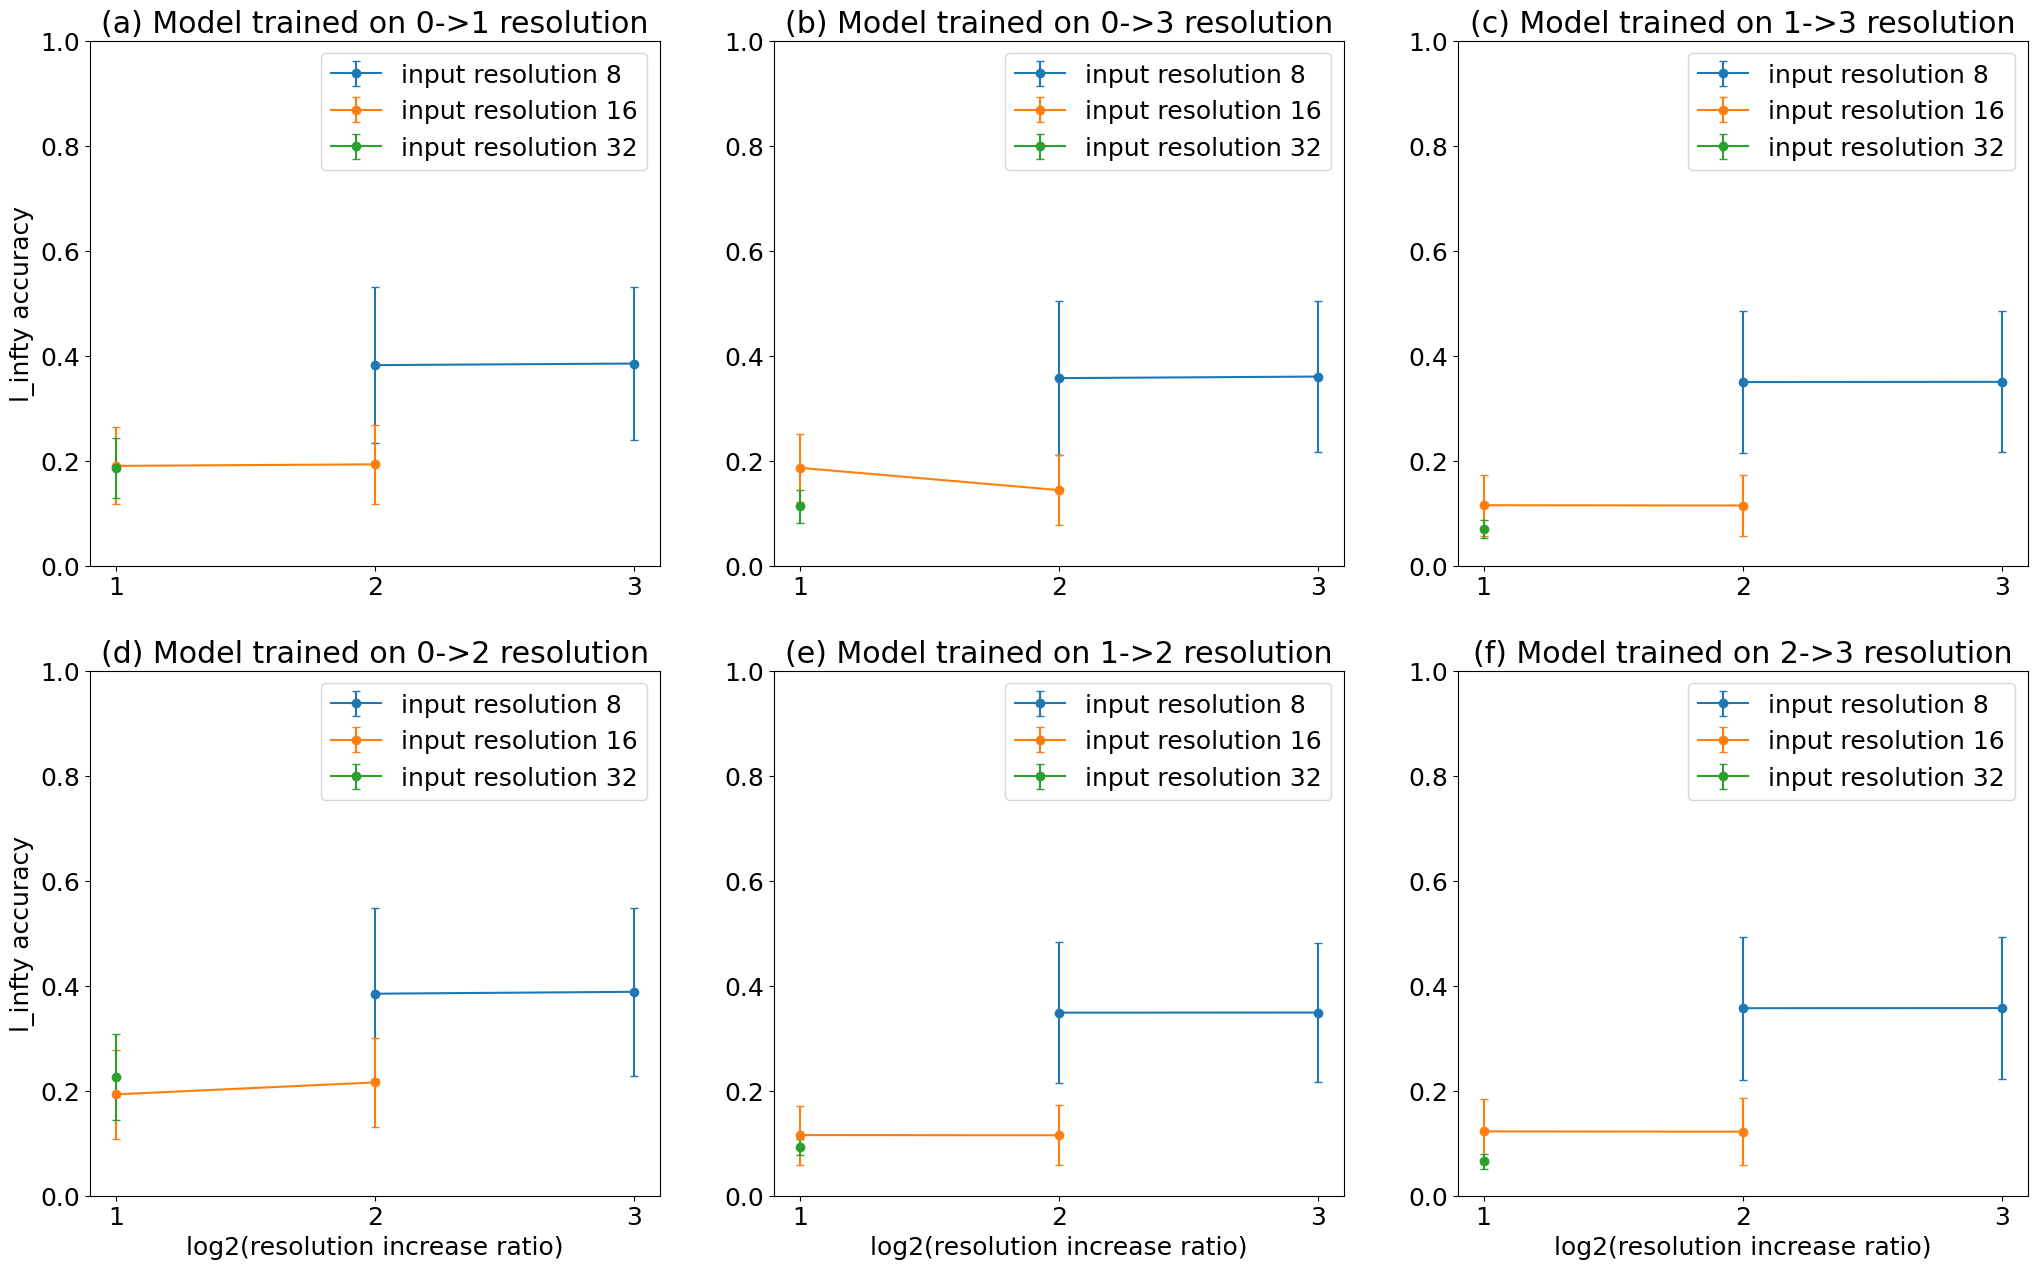

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'font.size': 18})
import numpy as np

l_infty_accuracy_0_2 = [0.3821, 0.3848, 0.3573, 0.3487, 0.3498, 0.3572]
l_infty_accuracy_0_2_std = [0.1482, 0.1623, 0.1461, 0.1341, 0.1356, 0.1361]
l_infty_accuracy_0_3 = [0.3851, 0.3884, 0.3603, 0.3489, 0.3503, 0.3574]
l_infty_accuracy_0_3_std = [0.1465, 0.1601, 0.1444, 0.1332, 0.1346, 0.1353]
l_infty_accuracy_1_2 = [0.1902, 0.1931, 0.1865, 0.1155, 0.1152, 0.1225]
l_infty_accuracy_1_2_std = [0.0733, 0.0851, 0.0653, 0.0563, 0.0579, 0.0623]
l_infty_accuracy_1_3 = [0.1931, 0.2158, 0.1441, 0.1152, 0.1147, 0.1220]
l_infty_accuracy_1_3_std = [0.0755, 0.0855, 0.0660, 0.0570, 0.0587, 0.0632]
l_infty_accuracy_2_3 = [0.1865, 0.2258, 0.1131, 0.0931, 0.0707, 0.0658]
l_infty_accuracy_2_3_std = [0.0566, 0.0823, 0.0309, 0.0155, 0.0173, 0.0143]

resolution_set = [8, 16, 32, 64]
x_0 = [32/8, 64/8]
x_1 = [32/16, 64/16]
x_2 = [64/32]
fig_title = ['0->1', '0->2', '0->3', '1->2', '1->3', '2->3']
fig_squence = ['(a)', '(d)', '(b)', '(e)', '(c)', '(f)']
# plot subplots of column-wise accuracy
num_cols = 6
fig, axs = plt.subplots(2, int(num_cols / 2), figsize=(25, 15))
for i in range(num_cols):
    x = int(i // 2)
    y = int(i % 2)
    # plot log-log error bars with x axis as the resolution increase ratio, y axis as the accuracy. Each input resolution will be a separate line.
    axs[y, x].errorbar(np.log2(x_0), [l_infty_accuracy_0_2[i], l_infty_accuracy_0_3[i]], yerr=[l_infty_accuracy_0_2_std[i], l_infty_accuracy_0_3_std[i]], fmt='o-', label='input resolution 8', capsize=3)
    axs[y, x].errorbar(np.log2(x_1), [l_infty_accuracy_1_2[i], l_infty_accuracy_1_3[i]], yerr=[l_infty_accuracy_1_2_std[i], l_infty_accuracy_1_3_std[i]], fmt='o-', label='input resolution 16', capsize=3)
    axs[y, x].errorbar(np.log2(x_2), [l_infty_accuracy_2_3[i]], yerr=[l_infty_accuracy_2_3_std[i]], fmt='o-', label='input resolution 32', capsize=3)
    # only 2nd row has x-axis label
    if y == 1:
        axs[y, x].set_xlabel('log2(resolution increase ratio)')
    axs[y, x].set_xticks(np.log2([2, 4, 8]))
    # only 1st column has y-axis label
    if x == 0:
        axs[y, x].set_ylabel('l_infty accuracy')
    axs[y, x].set_ylim([0, 1])
    axs[y, x].set_title('{} Model trained on {} resolution'.format(fig_squence[i], fig_title[i]))
    axs[y, x].legend()

# save as pdf
plt.savefig('l_infty_accuracy.pdf')


In [10]:
import matplotlib.pyplot as plt

def visualize_prediction(data):
    x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr

    x = data.pos[:, 0].detach().cpu().numpy()
    y = data.pos[:, 1].detach().cpu().numpy()
    # x = data.pos[:, 0].detach().cpu().numpy()
    # y = data.pos[:, 1].detach().cpu().numpy()

    x_values = np.unique(x)
    y_values = np.unique(y)

    temp_grid_true = data.y.cpu().detach().numpy().squeeze().reshape(len(x_values), len(y_values))
    fig = plt.figure(figsize=(12, 6))
    plt.contourf(x_values, y_values, temp_grid_true, levels=np.linspace(0, 1, 100))
    # plt.contourf(x_values, y_values, temp_grid_true)
    # limit the three figures to have the same colorbar
    plt.colorbar(label='Velocity Magnitude')
    plt.title('Velocity Contour Plot')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

    x_low = data.pos[:, 0].detach().cpu().numpy()
    y_low = data.pos[:, 1].detach().cpu().numpy()

    x_values_low = np.unique(x_low)
    y_values_low = np.unique(y_low)
    # temp_grid_low = data.x.detach().cpu().numpy().squeeze().reshape(len(x_values_low), len(y_values_low))
    temp_grid_low = data.x[:, 0].detach().cpu().numpy().squeeze().reshape(len(x_values), len(y_values))

    fig = plt.figure(figsize=(12, 6))
    # plt.contourf(x_values_low, y_values_low, temp_grid_low, levels=np.linspace(0, 1, 100), cmap="RdBu_r")
    plt.contourf(x_values, y_values, temp_grid_low, levels=np.linspace(0, 1, 100))
    # plt.contourf(x_values, y_values, temp_grid_low)
    plt.colorbar(label='Velocity Magnitude')
    plt.title('Velocity Contour Map')   
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

In [17]:
from dataset.MatDataset import BurgersDataset

# load the dataset
dataset = BurgersDataset(root='dataset/burger', res_low=0, res_high=3, pre_transform='interpolate_high')


Processing...


IndexError: list index out of range

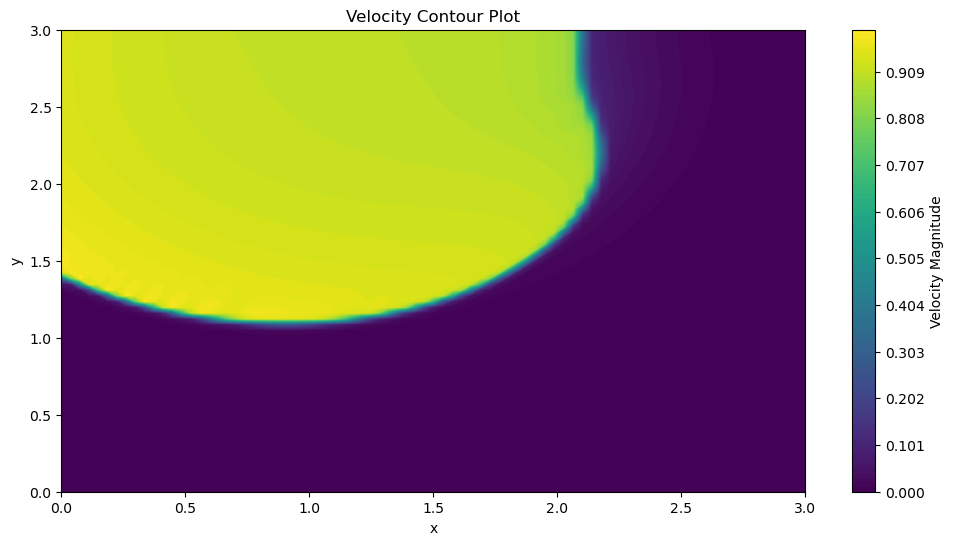

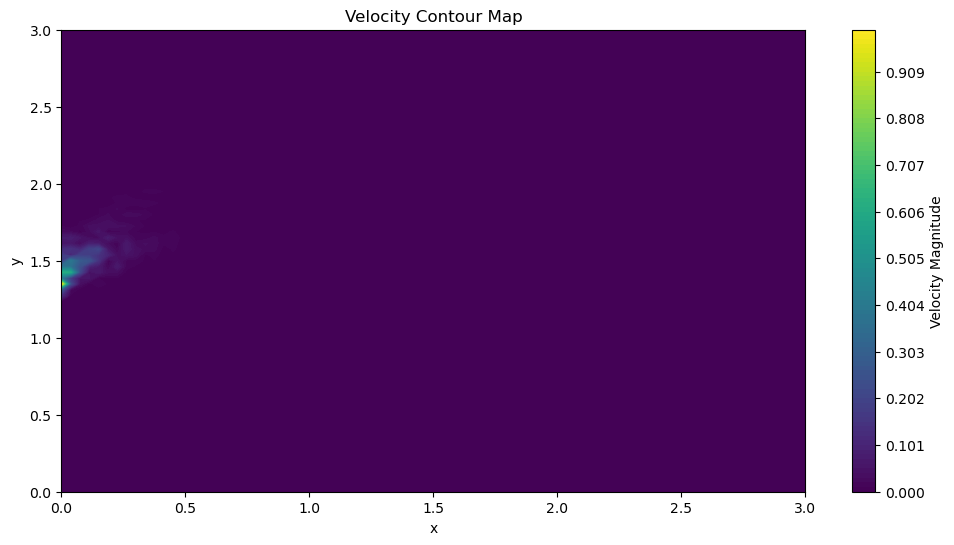

In [16]:
import numpy as np
# load one sample
sample = dataset[30]
# visualize the sample
visualize_prediction(sample)

In [16]:
from model.teecnet import TEECNet
from model.neural_operator import KernelNN
import torch
import torch_geometric as pyg

model1 = KernelNN(32, 128, 3, ker_in=5, in_width=1, out_width=1)
model2 = TEECNet(1, 32, 1, 3, retrieve_weight=False, num_powers=3)
# count the number of parameters
num_params1 = sum(p.numel() for p in model1.conv1.parameters())
num_params2 = sum(p.numel() for p in model2.kernel.kernel.convs[1].parameters())

print('Number of parameters in KernelNN: {}'.format(num_params1))
print('Number of parameters in TEECNet: {}'.format(num_params2))

Number of parameters in KernelNN: 150432
Number of parameters in TEECNet: 149376


In [43]:
file_name = 'step1_plane1.cgns'
with h5py.File(file_name) as f:
    print(f['Base']['Zone'].visititems(func))
    solution = f['Base']['Zone']['FlowSolution.N:1']['VelocityMagnitude'][' data'][:]
    coord_x = f['Base']['Zone']['GridCoordinates']['CoordinateX'][' data'][:]
    coord_y = f['Base']['Zone']['GridCoordinates']['CoordinateY'][' data'][:]
    coord_z = f['Base']['Zone']['GridCoordinates']['CoordinateZ'][' data'][:]
    connectivity = f['Base']['Zone']['plane-1-Pg']['ElementConnectivity'][' data'][:]

 data
FlowSolution.N:1
FlowSolution.N:1/VelocityMagnitude
FlowSolution.N:1/VelocityMagnitude/ data
GridCoordinates
GridCoordinates/CoordinateX
GridCoordinates/CoordinateX/ data
GridCoordinates/CoordinateY
GridCoordinates/CoordinateY/ data
GridCoordinates/CoordinateZ
GridCoordinates/CoordinateZ/ data
ZoneIterativeData
ZoneIterativeData/FlowSolutionPointers
ZoneIterativeData/FlowSolutionPointers/ data
ZoneType
ZoneType/ data
plane-1-Pg
plane-1-Pg/ data
plane-1-Pg/ElementConnectivity
plane-1-Pg/ElementConnectivity/ data
plane-1-Pg/ElementRange
plane-1-Pg/ElementRange/ data
plane-1-Pg/ElementStartOffset
plane-1-Pg/ElementStartOffset/ data
None


In [44]:
print(len(solution))
print(len(coord_x))
print(len(connectivity))

print(min(coord_x))
print(max(coord_x))
print(min(coord_y))
print(max(coord_y))
print(min(coord_z))
print(max(coord_z))

# remove y axis

168462
168462
532679
-0.2127000007838009
0.439268006064534
0.22663051540857052
0.22663249444599012
-0.4317500123903155
0.20635000486224886


In [45]:
def Intersection(x1, y1, x2, y2, x3, y3, x4, y4):
    """
    Calculate if two lines intersect
    """
    # line1
    k1 = (y2 - y1) / (x2 - x1)
    b1 = y1 - k1 * x1
    # line2
    k2 = (y4 - y3) / (x4 - x3)
    b2 = y3 - k2 * x3
    # if the two lines are parallel
    if k1 == k2:
        return False
    else:
        # the intersection point
        x = (b2 - b1) / (k1 - k2)
        y = k1 * x + b1
        # if the intersection point is on the two lines
        if (x1 <= x <= x2 or x2 <= x <= x1) and (x3 <= x <= x4 or x4 <= x <= x3):
            return True
        else:
            return False


def Intersection2D(line, rectangle):
    '''
    Calculate if the line intersects the rectangle
    :param line: [[x1, y1], [x2, y2]]
    :param rectangle: [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
    '''
    # line
    x1 = line[0][0]
    y1 = line[0][1]
    x2 = line[1][0]
    y2 = line[1][1]
    # rectangle
    x3 = rectangle[0][0]
    y3 = rectangle[0][1]
    x4 = rectangle[1][0]
    y4 = rectangle[1][1]
    x5 = rectangle[2][0]
    y5 = rectangle[2][1]
    x6 = rectangle[3][0]
    y6 = rectangle[3][1]
    # if the line intersects with any of the four edges of the rectangle, return True
    if Intersection(x1, y1, x2, y2, x3, y3, x4, y4) or Intersection(x1, y1, x2, y2, x4, y4, x5, y5) or Intersection(x1,
                                                                                                                  y1,
                                                                                                                  x2,
                                                                                                                  y2,
                                                                                                                  x5,
                                                                                                                  y5,
                                                                                                                  x6,
                                                                                                                  y6) or Intersection(
            x1, y1, x2, y2, x6, y6, x3, y3):
        return True
    else:
        return False



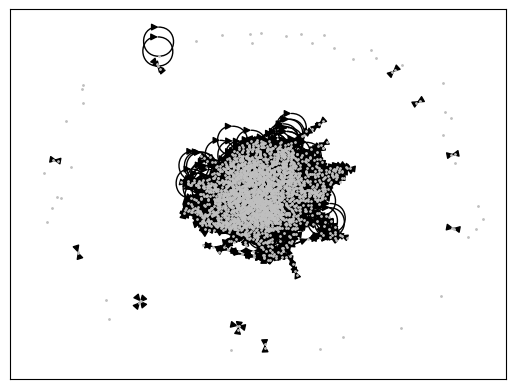

In [46]:
# construct connectivity matrix based on connectivity
connectivity_list = []
for i in range(len(connectivity)-1):
    connectivity_list.append(np.array([connectivity[i], connectivity[i+1]]))
    connectivity_list.append(np.array([connectivity[i+1], connectivity[i]]))

connectivity_list = np.array(connectivity_list)

import torch
import torch_geometric as pyg
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

# construct edge_index
edge_index = torch.tensor(connectivity_list, dtype=torch.long).t().contiguous()

# data = Data(x=torch.tensor(solution, dtype=torch.float), edge_index=edge_index)
# print(data.is_directed())

# select points within the region of x = [-0.01, 0.4], z = [-0.01, 0.4]
reduced_idx = (coord_x > -0.005) & (coord_x < 0.01) & (coord_z > -0.012) & (coord_z < 0.005)
solution_reduced = solution[reduced_idx].reshape(-1, 1)
# normalize the solution
solution_reduced = (solution_reduced - np.min(solution_reduced)) / (np.max(solution_reduced) - np.min(solution_reduced))
coord_x_reduced = coord_x[reduced_idx]
coord_z_reduced = coord_z[reduced_idx]
reduced_idx = np.where(reduced_idx)[0]
# pick connectivity containing the index of nodes in the reduced mesh
connectivity_list_reduced = []
for i in range(len(connectivity_list)):
    if connectivity_list[i][0] in reduced_idx and connectivity_list[i][1] in reduced_idx:
        # print(np.where(reduced_idx == connectivity_list[i][0]))
        connectivity_list_reduced.append([np.where(reduced_idx == connectivity_list[i][0])[0], np.where(reduced_idx == connectivity_list[i][1])[0]])

connectivity_list_reduced = np.array(connectivity_list_reduced).squeeze()
edge_index_reduced = torch.tensor(connectivity_list_reduced, dtype=torch.long).t().contiguous()
# compute edge attributes with format [x1, z1, x2, z2, length]
edge_attr = []
for i in range(len(connectivity_list_reduced)):
    x1 = coord_x_reduced[connectivity_list_reduced[i][0]]
    z1 = coord_z_reduced[connectivity_list_reduced[i][0]]
    x2 = coord_x_reduced[connectivity_list_reduced[i][1]]
    z2 = coord_z_reduced[connectivity_list_reduced[i][1]]
    length = np.sqrt((x2 - x1)**2 + (z2 - z1)**2)
    edge_attr.append(np.array([x1, z1, x2, z2, length]))

edge_attr = np.array(edge_attr)
    
edge_attr = torch.tensor(edge_attr, dtype=torch.float)

data_reduced = Data(x=torch.tensor(solution_reduced, dtype=torch.float), edge_index=edge_index_reduced, edge_attr=edge_attr)

g = pyg.utils.to_networkx(data_reduced, to_undirected=False)
nx.draw_networkx(g, with_labels=False, node_size=1, node_color=[[0.75, 0.75, 0.75]])

# tri = Triangulation(coord_x_reduced, coord_z_reduced)
# plt.tricontourf(tri, solution_reduced)
# # plot a governing rectangle
# square0 = plt.Rectangle((0.00365, -0.003), width=0.0003, height=0.003, fill=False)
# square1 = plt.Rectangle((0.0011, -0.003), width=0.0003, height=0.003, fill=False)
# square2 = plt.Rectangle((0.0062, -0.003), width=0.0003, height=0.003, fill=False)
# square3 = plt.Rectangle((0.0087, -0.003), width=0.0003, height=0.003, fill=False)
# square4 = plt.Rectangle((0.0024, -0.0061), width=0.0003, height=0.003, fill=False)
# square5 = plt.Rectangle((0.0049, -0.0061), width=0.0003, height=0.003, fill=False)
# square6 = plt.Rectangle((0.0075, -0.0061), width=0.0003, height=0.003, fill=False)
# square7 = plt.Rectangle((0.00365, -0.0093), width=0.0003, height=0.003, fill=False)
# square8 = plt.Rectangle((0.0062, -0.0093), width=0.0003, height=0.003, fill=False)
# square9 = plt.Rectangle((0.0011, -0.0093), width=0.0003, height=0.003, fill=False)
# square10 = plt.Rectangle((0.0087, -0.0093), width=0.0003, height=0.003, fill=False)
# square11 = plt.Rectangle((0.0024, -0.0125), width=0.0003, height=0.003, fill=False)
# square12 = plt.Rectangle((0.0049, -0.0125), width=0.0003, height=0.003, fill=False)
# square13 = plt.Rectangle((0.0075, -0.0125), width=0.0003, height=0.003, fill=False)

# plt.gca().add_patch(square0)
# plt.gca().add_patch(square1)
# plt.gca().add_patch(square2)
# plt.gca().add_patch(square3)
# plt.gca().add_patch(square4)
# plt.gca().add_patch(square5)
# plt.gca().add_patch(square6)
# plt.gca().add_patch(square7)
# plt.gca().add_patch(square8)
# plt.gca().add_patch(square9)
# plt.gca().add_patch(square10)
# plt.gca().add_patch(square11)
# plt.gca().add_patch(square12)
# plt.gca().add_patch(square13)
# plt.show()

# # sample 2 every 5 points to form a coarser mesh 
# solution_reduced = solution_reduced[::3]
# coord_x_reduced = coord_x_reduced[::3]
# coord_z_reduced = coord_z_reduced[::3]
# tri = Triangulation(coord_x_reduced, coord_z_reduced)
# # plt.tricontourf(tri, solution_reduced)

# # remove all the edges inside the rectangles from tri
# triangles = tri.triangles
# # use Intersection2D to determine if the edge is inside the rectangle, and remove it if it is
# triangles_new = []
# for i in range(len(triangles)):
#     if Intersection2D([[coord_x_reduced[triangles[i][0]], coord_z_reduced[triangles[i][0]]], [coord_x_reduced[triangles[i][1]], coord_z_reduced[triangles[i][1]]]], [[0.00365, -0.003], [0.0011, -0.003], [0.0062, -0.003], [0.0087, -0.003]]) == False and Intersection2D([[coord_x_reduced[triangles[i][0]], coord_z_reduced[triangles[i][0]]], [coord_x_reduced[triangles[i][1]], coord_z_reduced[triangles[i][1]]]], [[0.0024, -0.0061], [0.0049, -0.0061], [0.0075, -0.0061], [0.00365, -0.0093]]) == False and Intersection2D([[coord_x_reduced[triangles[i][0]], coord_z_reduced[triangles[i][0]]], [coord_x_reduced[triangles[i][1]], coord_z_reduced[triangles[i][1]]]], [[0.0062, -0.0093], [0.0011, -0.0093], [0.0087, -0.0093], [0.0024, -0.0125]]) == False and Intersection2D([[coord_x_reduced[triangles[i][0]], coord_z_reduced[triangles[i][0]]], [coord_x_reduced[triangles[i][1]], coord_z_reduced[triangles[i][1]]]], [[0.0049, -0.0125], [0.0075, -0.0125], [0.00365, -0.003], [0.0011, -0.003]]) == False:
#         triangles_new.append(triangles[i])



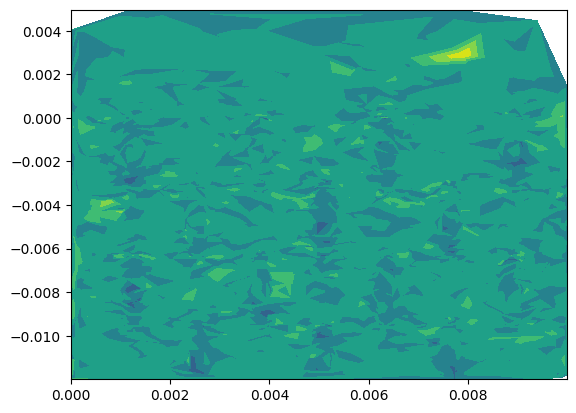

In [47]:
from model.teecnet import TEECNet

model = TEECNet(1, 32, 1, 3, num_powers=3, retrieve_weight=False)
model.load_state_dict(torch.load('checkpoints/exp_1_megaflow/increased_range/TEECNet/res_0_1/model_30.pt', map_location='cpu'))
model.eval()

# predict the solution
with torch.no_grad():
    pred = model(data_reduced.x, data_reduced.edge_index, data_reduced.edge_attr)

# plot the predicted solution
tri = Triangulation(coord_x_reduced, coord_z_reduced)
plt.tricontourf(tri, pred.squeeze().numpy())
plt.show()
    